# Quantitative Data

## [One sample T-Test](#One-Sample-T-Test)
- [Ex1](#Ex1:-Average-Student-Scores->-30-?)


## [Independent T-Test](#Independent-T-Test-Two-Sample-(Mean) )
- [Ex1](#Ex1:-Average-Male-Incomes-<-Average-Female-Incomes-?) 
- [Ex2](#Ex2:-Male's-Pre-Test-Scores->-Female's-Post-Test-Female-Scores-?)

## [Paired T-Test](#Paired-T-Test-Two-Sample-(Mean) )
- [Ex1](#Ex1:-Students'-Per-test-scores-<-Students'-Post-test-scores-?)
- [Ex2](#Ex2:-Before-Training-Scores-<-After-Training-Scores-?)


In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
#from statsmodels.stats import weightstats as stests
import seaborn as sns

# One Sample T-Test (Mean)

## Ex1: Average Student Scores > 30 ?

- $$H_0 : \mu <= 3.00$$
- $$H_1 : \mu > 3.00$$

In [2]:
test_score = pd.read_excel('t-test one sample.xlsx', sheet_name='ตาราง C', skiprows=1)
test_score.drop('Unnamed: 0', axis=1, inplace=True)

test_score[['grade']].describe()

,grade
count,100.00000
mean,3.18230
std,0.91587
min,2.20000
25%,2.84000
50%,3.09000
75%,3.37000
max,9.00000


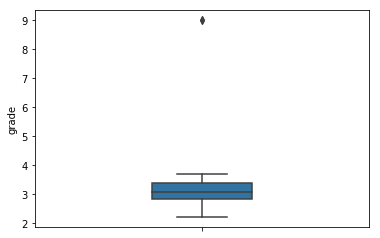

In [3]:
sns.boxplot(data=test_score, x='grade', orient='v', width=0.3)

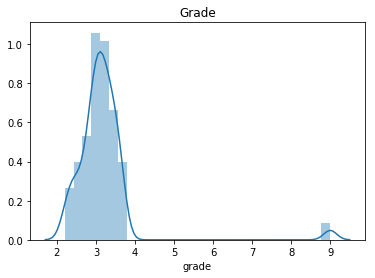

In [5]:
sns.distplot(a=test_score['grade']).set_title('Grade');

## T-Test

In [6]:
def T_test_one(x, popmean, stats_test='two-sided'):
    one_ttest, pval_two = stats.ttest_1samp(a=x, popmean=popmean)
    
    dof = x.size-1
    pval_upper = pval_two/2 
    pval_lower = 1-pval_upper
    
    tcrit = stats.t.ppf(0.05, dof)
    
    
    print('===================================================[Degree of freedom]===========================================')
    print('Degree of freedom: ', dof)
    
    print('========================================================[T-Test]=================================================')
    
    types_test = {'left':tcrit, 'right': abs(float(tcrit)), 'two_side': abs(float(tcrit))}
    
    t_crits = types_test[stats_test]        
    print('T-Test: ', float(one_ttest))
    print('T-Critical: ', float(t_crits))
    
    if stats_test == 'left':
        left_test = {'left':[print("Reject Null Hypothesis(H0)") 
                             if one_ttest < t_crits else print("Accept Null Hypothesis(H0)")]} 
    else:
        right_test = {'right':[print("Reject Null Hypothesis(H0)") 
                               if one_ttest > t_crits else print("Accept Null Hypothesis(H0)")]}    
        
   
    print('========================================================[P-Value]================================================')
    print('P-Value(upper-tail): ', float(pval_lower))
    print('P-Value(upper-tail): ', float(pval_upper))
    print('P-Value(two-tail): ', float(pval_two))
    
    ptest = {'right':pval_upper, 'left':pval_lower, 'two-sided':pval_two}
    if stats_test in ptest:
        pvale = ptest[stats_test]
        if pvale < 0.05:
            print("Reject Null Hypothesis(H0)")
        else:
            print("Accept Null Hypothesis(H0)")

In [7]:
T_test_one(test_score['grade'], popmean=3, stats_test='right')

===================================================[Degree of freedom]===========================================
Degree of freedom:  99
========================================================[T-Test]=================================================
T-Test:  1.9904571229970796
T-Critical:  1.6603911559963902
Reject Null Hypothesis(H0)
========================================================[P-Value]================================================
P-Value(upper-tail):  0.9753512026195852
P-Value(upper-tail):  0.024648797380414787
P-Value(two-tail):  0.04929759476082957
Reject Null Hypothesis(H0)


### Conclusion
Question : Average Student Scores > 30 ?
- Reject Null Hypothesis(H0) >>> Average Student Scores > 30 (H1)

----

# Independent T-Test Two Sample (Mean)

- $$H_0 : \mu_1 >= \mu_2$$
- $$H_1 : \mu_1 < \mu_2$$

## Ex1: Average Male Incomes < Average Female Incomes ? 


- $$H_0 : Average Male Incomes (\mu_1) >= Average Female Incomes (\mu_2)$$
- $$H_1 : Average Male Incomes (\mu_1) < Average Female Incomes (\mu_2)$$

In [8]:
test_var = pd.read_excel('independent-t-test two sample.xlsx', sheet_name='ตาราง C', skiprows=1)
test_var.drop('Unnamed: 0', axis=1, inplace=True)

# Select  interested columns
ttest_var = test_var.loc[:,['sex', 'salary']]
ttest_var['sex'].replace(to_replace=['ชาย', 'หญิง'], value=['Male', 'Female'], inplace=True)
ttest_var.head()

,sex,salary
0,Male,3000
1,Male,8000
2,Male,14000
3,Male,9000
4,Male,5000


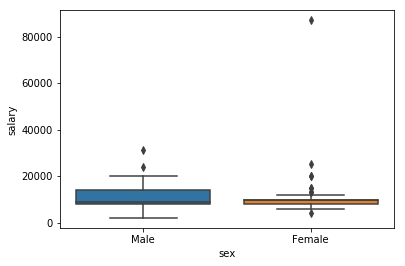

In [9]:
sns.boxplot(data=ttest_var, x='sex', y='salary')

In [10]:
# Create function BoxPlot
def Box_plot(x, title):
    mode = stats.mode(x)[0][0]
    mean = np.mean(x)
    median = np.median(x)

    print('Mode:', mode)
    print('Mean:', mean)
    print('Median:', median)

    sns.boxplot(x, orient='v').set_title(title)
    plt.axvline(x=mode, color='blue')
    plt.axvline(x=mean, color='black')
    plt.axvline(x=median, color='yellow')
    plt.show();

Mode: 8000
Mean: 10546.296296296296
Median: 9000.0


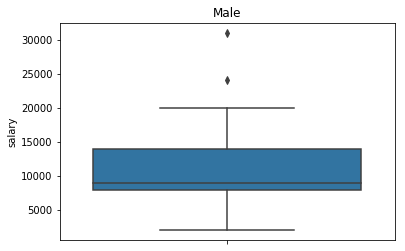

Mode: 8000
Mean: 11739.130434782608
Median: 9500.0


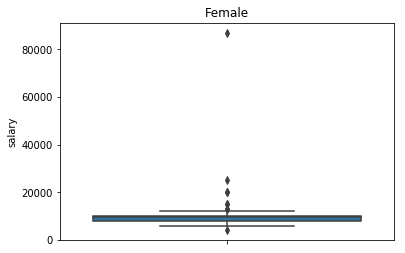

In [11]:
pop_male = ttest_var[ttest_var['sex'] == 'Male'][['salary']]
pop_female = ttest_var[ttest_var['sex'] == 'Female'][['salary']]

# use Boxplot function
Box_plot(test_var[test_var['sex'] == 'ชาย']['salary'], 'Male')
Box_plot(test_var[test_var['sex'] == 'หญิง']['salary'], 'Female')

In [12]:
# Create Distribution function
def Distribution_plot(x, title):
    mode = stats.mode(x)[0][0]
    mean = np.mean(x)
    median = np.median(x)

    print('Mode:', mode)
    print('Mean:', mean)
    print('Median:', median)

    sns.distplot(x, kde=True).set_title(title)
    plt.axvline(x=mode, color='blue')
    plt.axvline(x=mean, color='black')
    plt.axvline(x=median, color='yellow')
    plt.show();

Mode: 8000
Mean: 11095.0
Median: 9000.0


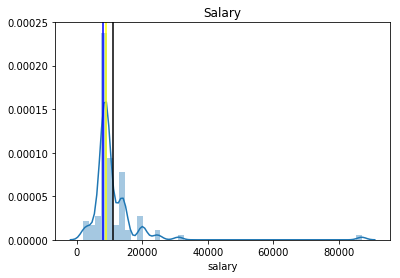

Mode: 8000
Mean: 11095.0
Median: 9000.0


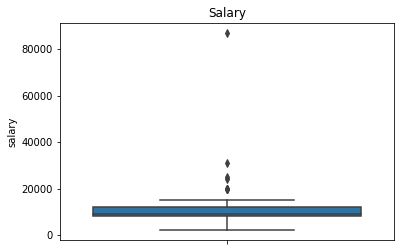

In [13]:
# Examine salary
Distribution_plot(x=ttest_var['salary'], title='Salary');
Box_plot(ttest_var['salary'], 'Salary')

## Test Variance Two Sample

- $$H_0 : \sigma_1^2 = \sigma_2^2$$
- $$H_1 : \sigma_1^2 \neq \sigma_2^2$$

In [14]:
# Create function for checking of variance that is equal or unequal
def Check_Variance(x1, x2, types):
    type_check = {'equal':0.05, 'unequal':0.95}
    
    if x1.shape[0] > x2.shape[0]:
        F_test = np.var(x1)/np.var(x2)
        F_Critical = stats.f.ppf(type_check[types], x1.shape[0]-1, x2.shape[0]-1)
        dof = (x1.var()/x1.size + x2.var()/x2.size)**2 / ((x1.var()/x1.size)**2 / (x1.size-1) + (x2.var()/x2.size)**2 / (x2.size-1))
    else:
        F_test = np.var(x2)/np.var(x1)
        F_Critical = stats.f.ppf(type_check[types], x2.shape[0]-1, x1.shape[0]-1)
        dof = (x2.var()/x2.size + x1.var()/x1.size)**2 / ((x2.var()/x2.size)**2 / (x2.size-1) + (x1.var()/x1.size)**2 / (x1.size-1))

        
    if float(F_test) < 1:
        if float(F_test) < F_Critical:
            hypoths = "Reject Null Hypothesis(H0) : Variance Different"
        else:
            hypoths = "Accept Null Hypothesis(H0) : Variance Not Different"        
    else:
        if float(F_test) > F_Critical:
            hypoths = "Reject Null Hypothesis(H0) : Variance Different"
        else:
            hypoths = "Accept Null Hypothesis(H0) : Variance Not Different"  
            

    return float(F_test), float(F_Critical), hypoths, int(round(dof,0))

## Independent T-Test Two Sample

- $$H_0 : \mu_1 >= \mu_2$$
- $$H_1 : \mu_1 < \mu_2$$

In [15]:
# Create Independent T-Test Two Sample
def T_test_ind(x1, x2, equal_var, type_test, stats_test):
    ttest, pval = stats.ttest_ind(x1, x2, equal_var=equal_var)
    
    pval_two = pval
    pval_one = pval/2
    
    tcrit = stats.t.ppf(0.05, dof)
    
    
    print('===================================================[Degree of freedom]===========================================')
    print('Degree of freedom: ', dof)
    
    print('========================================================[T-Test]=================================================')
    
    types_test = {'left':tcrit, 'right': abs(float(tcrit)), 'two_side': abs(float(tcrit))}
    
    t_crits = types_test[stats_test]        
    print('T-Test: ', float(ttest))
    print('T-Critical: ', float(t_crits))
    
    if stats_test == 'left':
        left_test = {'left':[print("Reject Null Hypothesis(H0)") 
                             if ttest < t_crits else print("Accept Null Hypothesis(H0)")]} 
    else:
        right_test = {'right':[print("Reject Null Hypothesis(H0)") 
                               if ttest > t_crits else print("Accept Null Hypothesis(H0)")]}    
        
   
    print('========================================================[P-Value]================================================')
    print('P-Value(one-tail): ', float(pval_one))
    print('P-Value(two-tail): ', float(pval_two))
    
    ptest = {'unequal':pval_one, 'equal':pval_two}
    if type_test in ptest:
        pvale = ptest[type_test]
        if pval < 0.05:
            print("Reject Null Hypothesis(H0)")
        else:
            print("Accept Null Hypothesis(H0)")
            

In [16]:
# Result sets

ftest, fcrit, hypoths, dof = Check_Variance(pop_male, pop_female, types='equal')

print('============ ============================================[F-Test]=================================================')
print('F-Test: ', float(ftest))
print('F-Critical: ', float(fcrit))

print('==================================================[Variance Hypothesis]==========================================')
print('Result Check Variance: ', hypoths)
print('\n')


T_test_ind(pop_male, pop_female, equal_var=False, type_test='unequal', stats_test='left')

============ ============================================[F-Test]=================================================
F-Test:  0.197572050631124
F-Critical:  0.6244762440888396
==================================================[Variance Hypothesis]==========================================
Result Check Variance:  Reject Null Hypothesis(H0) : Variance Different


===================================================[Degree of freedom]===========================================
Degree of freedom:  60
========================================================[T-Test]=================================================
T-Test:  -0.6271854148601569
T-Critical:  -1.6706488646505933
Accept Null Hypothesis(H0)
========================================================[P-Value]================================================
P-Value(one-tail):  0.2664599511441542
P-Value(two-tail):  0.5329199022883084
Accept Null Hypothesis(H0)


### Conclusion
Question : Average Male Incomes < Average Female Incomes ?
- Accept Null Hypothesis(H0) >>> Average Male Incomes >= Average Female Incomes (H0)

----

## Ex2: Male's Pre-Test Scores > Female's Post-Test Female Scores ?

- $$H_0 : Male's Pre-Test Scores(\mu_1) <= Female's Post-Test Female Scores(\mu_2)$$
- $$H_1 : Male's Pre-Test Scores(\mu_1) > Female's Post-Test Female Scores(\mu_2)$$

In [17]:
test2_var = pd.read_excel('independent-t-test two sample-2.xlsx', sheet_name='ตาราง C', skiprows=1)
test2_var.drop('Unnamed: 0', axis=1, inplace=True)

# Select interested columns
ttest_var = test2_var.loc[:, ['sex', 'pretest']]
ttest_var['sex'] = ttest_var['sex'].map({'ชาย':'Male', 'หญิง':'Female'})
ttest_var.head()

,sex,pretest
0,Male,21
1,Male,8
2,Male,18
3,Male,11
4,Male,18


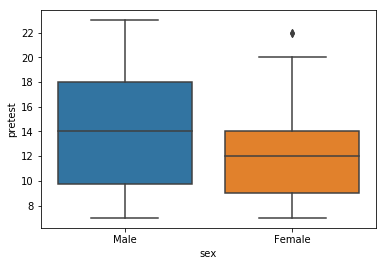

In [18]:
sns.boxplot(data=ttest_var, x='sex', y='pretest')

Mode: 18
Mean: 14.423076923076923
Median: 14.0


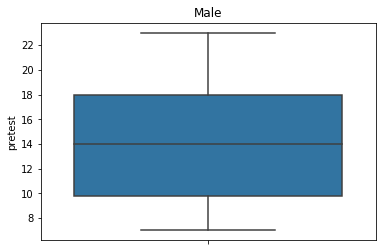

Mode: 13
Mean: 12.541666666666666
Median: 12.0


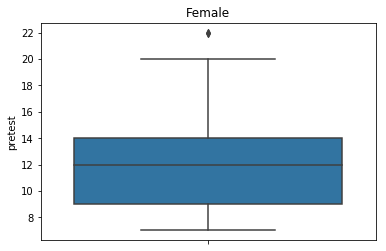

In [19]:
pop_female2 = ttest_var[ttest_var['sex'] == 'Female']['pretest']
pop_male2 = ttest_var[ttest_var['sex'] == 'Male']['pretest']

Box_plot(pop_male2, 'Male')
Box_plot(pop_female2, 'Female')

Mode: 18
Mean: 13.52
Median: 13.0


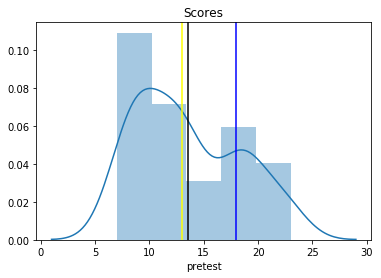

Mode: 18
Mean: 13.52
Median: 13.0


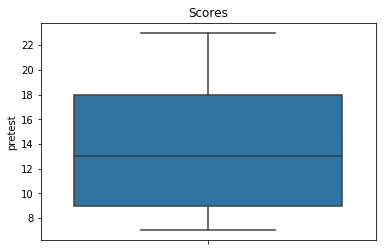

In [20]:
# Examine Scores
Distribution_plot(x=ttest_var['pretest'], title='Scores');
Box_plot(ttest_var['pretest'], 'Scores')

## Test Variance Two Sample

- $$H_0 : \sigma_1^2 = \sigma_2^2$$
- $$H_1 : \sigma_1^2 \neq \sigma_2^2$$

## Independent T-Test Two Sample

- $$H_0 : \mu_1 <= \mu_2$$
- $$H_1 : \mu_1 > \mu_2$$

In [21]:
# Result sets

ftest, fcrit, hypoths, dof = Check_Variance(pop_male2, pop_female2, types='unequal')

print('========================================================[F-Test]=================================================')
print('F-Test: ', float(ftest))
print('F-Critical: ', float(fcrit) )
print('\n')

print('==================================================[Variance Hypothesis]==========================================')
print('Result Check Variance: ', hypoths)
print('\n')


T_test_ind(pop_male2, pop_female2, equal_var=True, type_test='unequal', stats_test='right')

========================================================[F-Test]=================================================
F-Test:  1.5401900222594687
F-Critical:  1.6122353047432207


==================================================[Variance Hypothesis]==========================================
Result Check Variance:  Accept Null Hypothesis(H0) : Variance Not Different


===================================================[Degree of freedom]===========================================
Degree of freedom:  96
========================================================[T-Test]=================================================
T-Test:  2.014000945483352
T-Critical:  1.6608814403008012
Reject Null Hypothesis(H0)
========================================================[P-Value]================================================
P-Value(one-tail):  0.023375237004619343
P-Value(two-tail):  0.046750474009238686
Reject Null Hypothesis(H0)


### Conclusion
Question : Male's Pre-Test Scores > Female's Post-Test Female Scores ?
- Reject Null Hypothesis(H0) >>> Pre-Test Male Scores > Pre-Test Female Scores (H1)

----

# Paired T-Test Two Sample (Mean)

## Ex1: Students' Per-test scores < Students' Post-test scores ?

- $$H_0 : Students' Per-test scores(\mu_1) >= Students' Post-test scores(\mu_2)$$
- $$H_1 : Students' Per-test scores(\mu_1) < Students' Post-test scores(\mu_2)$$

In [22]:
pre_post_score = pd.read_excel('paired-t-test two sample.xlsx', sheet_name='ตาราง C', skiprows=1)
pre_post_score.drop('Unnamed: 0', axis=1, inplace=True)
pre_post_score['sex'].replace(to_replace=['ชาย', 'หญิง'], value=['Male', 'Female'], inplace=True)

# For Visualization
pre_post_score_viz = pd.melt(pre_post_score[['id', 'sex', 'pretest', 'posttest']],
                         id_vars=['id', 'sex'],
                         value_name='Value',
                         var_name='Testing')
pre_post_score_viz.head()

,id,sex,Testing,Value
0,1,Male,pretest,21
1,2,Male,pretest,8
2,3,Female,pretest,20
3,4,Male,pretest,18
4,5,Female,pretest,19


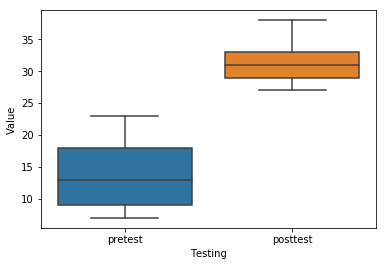

In [23]:
sns.boxplot(data=pre_post_score_viz, x='Testing', y='Value')

Mode: 18
Mean: 13.52
Median: 13.0


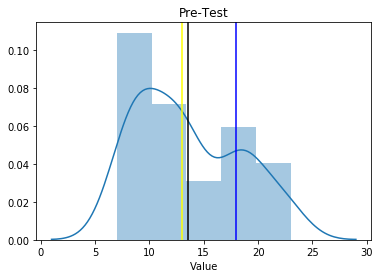

Mode: 29
Mean: 31.56
Median: 31.0


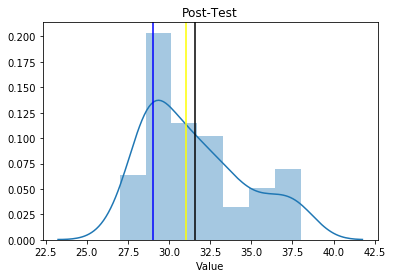

In [24]:
Distribution_plot(pre_post_score_viz[pre_post_score_viz['Testing'] == 'pretest']['Value'], 'Pre-Test');
Distribution_plot(pre_post_score_viz[pre_post_score_viz['Testing'] == 'posttest']['Value'], 'Post-Test');

In [25]:
# Create Paired T-Test two sample
def T_test_rel(x1, x2, type_test, stats_test):
    paired_t, pval = stats.ttest_rel(x1, x2)
    
    pval_two = pval
    pval_one = pval/2
    dof = x1.size-1
    tcrit = stats.t.ppf(0.05, dof)
    
    
    print('===================================================[Degree of freedom]===========================================')
    print('Degree of freedom: ', dof)
    
    print('========================================================[T-Test]=================================================')
    
    types_test = {'left':tcrit, 'right': abs(float(tcrit)), 'two_side': abs(float(tcrit))}
    
    t_crits = types_test[stats_test]        
    print('T-Test: ', float(paired_t))
    print('T-Critical: ', float(t_crits))
    
    if stats_test == 'left':
        left_test = {'left':[print("Reject Null Hypothesis(H0)") 
                             if paired_t < t_crits else print("Accept Null Hypothesis(H0)")]} 
    else:
        right_test = {'right':[print("Reject Null Hypothesis(H0)") 
                               if paired_t > t_crits else print("Accept Null Hypothesis(H0)")]}    
        
   
    print('========================================================[P-Value]================================================')
    print('P-Value(one-tail): ', float(pval_one))
    print('P-Value(two-tail): ', float(pval_two))
    
    ptest = {'unequal':pval_one, 'equal':pval_two}
    if type_test in ptest:
        pvale = ptest[type_test]
        if pval < 0.05:
            print("Reject Null Hypothesis(H0)")
        else:
            print("Accept Null Hypothesis(H0)")
            

In [26]:
T_test_rel(pre_post_score['pretest'], pre_post_score['posttest'], type_test='unequal', stats_test='left' )

===================================================[Degree of freedom]===========================================
Degree of freedom:  99
========================================================[T-Test]=================================================
T-Test:  -32.32274320244433
T-Critical:  -1.6603911559963902
Reject Null Hypothesis(H0)
========================================================[P-Value]================================================
P-Value(one-tail):  1.0414008578963889e-54
P-Value(two-tail):  2.0828017157927778e-54
Reject Null Hypothesis(H0)


### Conclusion
Question : Students' Per-test scores < Students' Post-test scores ?
- Reject Null Hypothesis(H0) >>> Students' Per-test scores < Students' Post-test scores (H1)

----

## Ex2: Before Training Scores < After Training Scores ?

- $$H_0 : Before Training Scores >= After Training Scores(\mu_2)$$
- $$H_1 :  Before Training Scores(\mu_1) < After Training Scores(\mu_2)$$

In [27]:
pre_post = pd.read_csv('pairTtest.csv')
pre_post.head()

,id,BeforeTra,AfterTra
0,1,3,5
1,2,4,7
2,3,6,5
3,4,5,5
4,5,4,6


In [28]:
pre_post_viz = pd.melt(pre_post,
                      id_vars='id',
                      var_name='Testing',
                      value_name='Value')
pre_post_viz.head()

,id,Testing,Value
0,1,BeforeTra,3
1,2,BeforeTra,4
2,3,BeforeTra,6
3,4,BeforeTra,5
4,5,BeforeTra,4


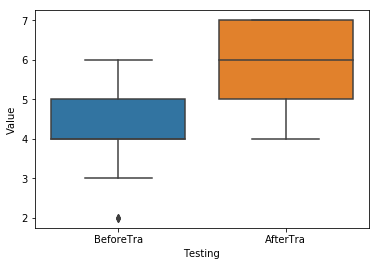

In [29]:
sns.boxplot(data=pre_post_viz, x='Testing', y='Value')

Mode: 5
Mean: 5.84
Median: 6.0


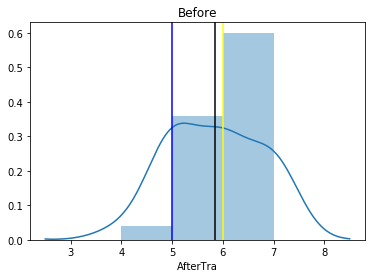

In [30]:
Distribution_plot(pre_post['AfterTra'], 'Before')

In [31]:
T_test_rel(pre_post['BeforeTra'], pre_post['AfterTra'], type_test='unequal', stats_test='left')

===================================================[Degree of freedom]===========================================
Degree of freedom:  24
========================================================[T-Test]=================================================
T-Test:  -5.432350912140854
T-Critical:  -1.7108820799094282
Reject Null Hypothesis(H0)
========================================================[P-Value]================================================
P-Value(one-tail):  6.983353046385384e-06
P-Value(two-tail):  1.3966706092770768e-05
Reject Null Hypothesis(H0)


### Conclusion
Question : Before Training Scores < After Training Scores ?
- Reject Null Hypothesis(H0) >>> Before Training Scores < After Training Scores (H1)

----